# Machine Learning Model

## Import csv

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../../cyberbullying/data/data.csv')
data.head()

,text,target
0,this is not creative those are the dictionar...,0.0
1,the term standard model is itself less npov...,0.0
2,true or false the situation as of march was...,0.0
3,next maybe you could work on being less conde...,0.0
4,this page will need disambiguation,0.0


In [3]:
data.shape

(230155, 2)

## Data Cleaning 2

### Stopwords

In [4]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

def remove_stop_words(text):
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(text) 
    text = [w for w in word_tokens if not w in stop_words]
    text= ' '.join(text)
    return text


In [5]:
data['text'] = data['text'].apply(remove_stop_words)
data.head()


,text,target
0,creative dictionary definitions terms insuranc...,0.0
1,term standard model less npov think wed prefer...,0.0
2,true false situation march saudi proposal land...,0.0
3,next maybe could work less condescending sugge...,0.0
4,page need disambiguation,0.0


### Lemmatize

In [6]:
data.head()

,text,target
0,creative dictionary definitions terms insuranc...,0.0
1,term standard model less npov think wed prefer...,0.0
2,true false situation march saudi proposal land...,0.0
3,next maybe could work less condescending sugge...,0.0
4,page need disambiguation,0.0


In [7]:
from nltk.stem import WordNetLemmatizer

def lematize_words(text):
    token_words=word_tokenize(text)
    token_words
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in token_words]
    text = lemmatized
    text= ' '.join(text)
    return text


In [8]:
data['text'] = data['text'].apply(lematize_words)
data.head()

,text,target
0,creative dictionary definition term insurance ...,0.0
1,term standard model le npov think wed prefer n...,0.0
2,true false situation march saudi proposal land...,0.0
3,next maybe could work le condescending suggest...,0.0
4,page need disambiguation,0.0


### Stemmer

In [9]:
from nltk.stem.porter import PorterStemmer
def stemmer_word(text):
    token_words=word_tokenize(text)
    token_words
    stemmer = PorterStemmer()
    stemmed = [stemmer.stem(word) for word in token_words]
    text = stemmed
    text= ' '.join(text)
    return text

In [10]:
data['text'] = data['text'].apply(stemmer_word)
data.head()

,text,target
0,creativ dictionari definit term insur ensur pr...,0.0
1,term standard model le npov think wed prefer n...,0.0
2,true fals situat march saudi propos land peac ...,0.0
3,next mayb could work le condescend suggest rea...,0.0
4,page need disambigu,0.0


## ML Modelling

### Balanceo 70/30

In [25]:
def conf_mx_metrics(cm):
    TN = cm[0][0]
    TP = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]
    
    recall = np.round_(TP/(TP+FN),3)
    precision = np.round_(TP/(TP+FP),3)
    accuracy = np.round_((TP+TN)/(TP+TN+FP+FN),3)
    
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"Accuracy: {accuracy}")

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.text,data.target,test_size=0.3,random_state=0)

In [12]:
def balance_df(X, y, ratio=0.3):
    df = pd.DataFrame({'text': X_train, 'target': y_train})
    df_class_0 = df[df['target'] == 0]
    df_class_1 = df[df['target'] == 1]
    df_class_1_len = df_class_1.shape[0]
    
    df_class_0_new = df_class_0.sample(int(df_class_1_len * (1-ratio)/ratio))
    df_new = pd.concat([df_class_0_new, df_class_1]).sample(frac=1).reset_index(drop=True)
    
    X = df_new['text']
    y = df_new['target']

    return X, y

In [13]:
X_train, y_train = balance_df(X_train,y_train)

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate
import numpy as np

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

nb_model = MultinomialNB()

cv_results = cross_validate(nb_model,X_train,y_train,cv=10,n_jobs=-1,scoring=['recall','precision','accuracy','f1'])

recall = np.round_(cv_results['test_recall'].mean(),3)
precision = np.round_(cv_results['test_precision'].mean(),3)
accuracy = np.round_(cv_results['test_accuracy'].mean(),3)
f1 = np.round_(cv_results['test_f1'].mean(),3)

print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Recall: 0.503
Precision: 0.866
Accuracy: 0.828
F1 Score: 0.636


In [15]:
X_test = vectorizer.transform(X_test)

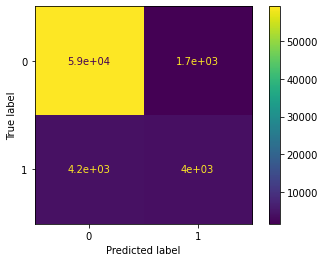

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

nb_model.fit(X_train,y_train)
y_pred = nb_model.predict(X_test)
cm7030 = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm7030,display_labels=[0,1])
disp.plot();

In [19]:
conf_mx_metrics(cm7030)

Recall: 0.487
Precision: 0.704
Accuracy: 0.915


### Balanceo 80/20

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.text,data.target,test_size=0.3,random_state=0)

In [28]:
X_train, y_train = balance_df(X_train,y_train,ratio=0.2)

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate
import numpy as np

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

nb_model = MultinomialNB()

cv_results = cross_validate(nb_model,X_train,y_train,cv=10,n_jobs=-1,scoring=['recall','precision','accuracy','f1'])

recall = np.round_(cv_results['test_recall'].mean(),3)
precision = np.round_(cv_results['test_precision'].mean(),3)
accuracy = np.round_(cv_results['test_accuracy'].mean(),3)
f1 = np.round_(cv_results['test_f1'].mean(),3)

print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Recall: 0.302
Precision: 0.867
Accuracy: 0.851
F1 Score: 0.447


In [30]:
X_test = vectorizer.transform(X_test)

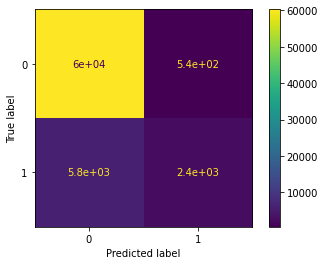

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

nb_model.fit(X_train,y_train)
y_pred = nb_model.predict(X_test)
cm8020 = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm8020,display_labels=[0,1])
disp.plot();

In [32]:
conf_mx_metrics(cm8020)

Recall: 0.297
Precision: 0.818
Accuracy: 0.908


### Balanceo 50/50

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.text,data.target,test_size=0.3,random_state=0)

In [21]:
X_train, y_train = balance_df(X_train,y_train,ratio=0.5)

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate
import numpy as np

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

nb_model = MultinomialNB()

cv_results = cross_validate(nb_model,X_train,y_train,cv=10,n_jobs=-1,scoring=['recall','precision','accuracy','f1'])

recall = np.round_(cv_results['test_recall'].mean(),3)
precision = np.round_(cv_results['test_precision'].mean(),3)
accuracy = np.round_(cv_results['test_accuracy'].mean(),3)
f1 = np.round_(cv_results['test_f1'].mean(),3)

print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Recall: 0.826
Precision: 0.832
Accuracy: 0.83
F1 Score: 0.829


In [23]:
X_test = vectorizer.transform(X_test)

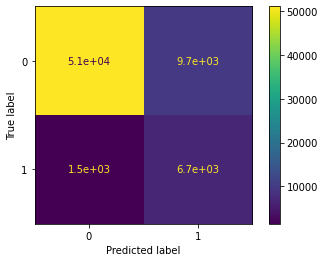

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

nb_model.fit(X_train,y_train)
y_pred = nb_model.predict(X_test)
cm5050 = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm5050,display_labels=[0,1])
disp.plot();

In [26]:
conf_mx_metrics(cm5050)

Recall: 0.821
Precision: 0.409
Accuracy: 0.838
